In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


data=scipy.io.loadmat("../Downloads/Assignment4/EM_points.mat")

In [2]:
main_data=data['Points']
main_data

array([[-0.3005007 ,  0.71622977,  0.        ],
       [-0.07260801,  1.39849283,  0.        ],
       [-0.209947  ,  1.32075583,  0.        ],
       ...,
       [ 1.42954638,  0.15714956,  1.        ],
       [ 1.14187298, -0.21691986,  1.        ],
       [ 1.49161487, -0.50410824,  1.        ]])

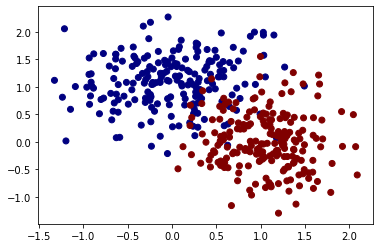

In [3]:
x,y=main_data[:,0],main_data[:,1]
plt.scatter(x,y,c=main_data[:,-1],cmap='jet')
plt.show()

In [4]:
# Check the labels:
#main_data[:,2]

In [5]:
#Initiate Clusters:
points=main_data[0:,:2]
C_1=points[0:1] #Cluster-1
C_2=points[1:2] #Cluster-2
#If you take the below points as the initial clusters,iterations to converge will jump from 10 to 12.
#C_1=[0,0]
#C_2=[1,1]

In [6]:
print(C_1)
print(C_2)

[[-0.3005007   0.71622977]]
[[-0.07260801  1.39849283]]


In [7]:
#Expectation part:
def calc_dist(a, b):
    return np.sum(np.square(a-b))

for i in range(50):
    #Distances to c1 and c2:
    dist_c1=np.sum(np.square(points-C_1),axis=1)
    dist_c2=np.sum(np.square(points-C_2),axis=1)
    
    #Weights calculation:
    W_c1=dist_c2/(dist_c1+dist_c2)
    W_c2=1-W_c1
    
    #SSE:
    SSE=np.sum(np.multiply(dist_c1,W_c1)+np.multiply(dist_c2,W_c2))
    
    #Store the old values:
    c1_old=C_1
    c2_old=C_2
    
    #Calculate new centers:
    C_1=np.matmul(np.transpose(np.square(W_c1)),points)/np.sum(np.square(W_c1))
    C_2=np.matmul(np.transpose(np.square(W_c2)),points)/np.sum(np.square(W_c2))
    
    #Print after two iterations:
    if i<=1:
        print("############################")
        print ("Iteration "+str(i+1)+':')
        print("Updated SSE:")
        print(SSE)
        print("Updated C1:")
        print(C_1)
        print("Updated C2:")
        print(C_2)
        
    #Calculate the converging distance(L1) in order to terminate:
    converge_sum=np.sum(np.abs(c1_old-C_1)+np.abs(c2_old-C_2))
    #Terminate condition:
    if converge_sum<=0.001:
        print("After "+str(i+1)+" iterations: "+str(converge_sum)+",clusters converge.")
        break
        
# print the final result:
print("######################################")
print("Converged C1 is: ")
print(C_1)
print("Converged C2 is: ")
print(C_2)

#assign_cluster = lambda pt: 0 if calc_dist(pt, C_1) <= calc_dist(pt, C_2) else 1
#assigned_clusters = np.apply_along_axis(assign_cluster,1,points)

############################
Iteration 1:
Updated SSE:
721.4956974886536
Updated C1:
[0.44528628 0.31233445]
Updated C2:
[0.42661802 0.95099126]
############################
Iteration 2:
Updated SSE:
395.2495171277726
Updated C1:
[0.71141242 0.12192137]
Updated C2:
[0.30463132 1.0173773 ]
After 10 iterations: 0.0004066330315507932,clusters converge.
######################################
Converged C1 is: 
[ 1.04436187 -0.02897887]
Converged C2 is: 
[-0.03375124  1.13281557]


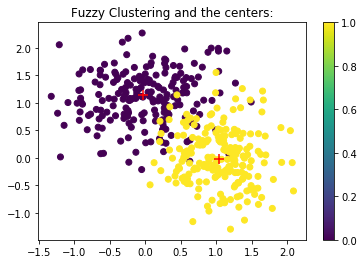

In [8]:
new_centers=[C_1,C_2]
#new_c=[new_centers[l] for l in new_centers]
x,y=main_data[:,0],main_data[:,1]
scatter=plt.scatter(x,y,c=main_data[:,-1])
for i,j in new_centers:
    x,y=main_data[:,0],main_data[:,1]
    #plt.scatter()
    plt.scatter(i,j,c='red',s=100,marker="+")
plt.colorbar(scatter)
plt.title("Fuzzy Clustering and the centers:")
plt.show()

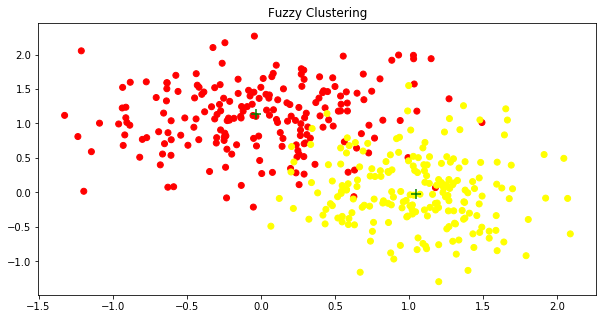

In [9]:
# In order to see the figure closely:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y,c=main_data[:,-1],cmap='autumn')
ax.set_title('Fuzzy Clustering')
for i,j in new_centers:
    #plt.scatter()
    ax.scatter(i,j,c='green',s=100,marker="+")

In [10]:
points.shape

(400, 2)

In [11]:
assign_cluster = lambda pt: 1 if calc_dist(pt, C_1) < calc_dist(pt, C_2) else 0
new_labels = np.apply_along_axis(assign_cluster,1,points)

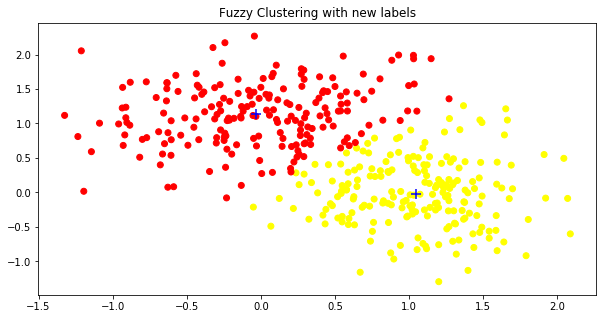

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y,c=new_labels,cmap='autumn')
ax.set_title('Fuzzy Clustering with new labels')
for i,j in new_centers:
    #plt.scatter()
    ax.scatter(i,j,c='blue',s=100,marker="+")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'C' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Legend does no

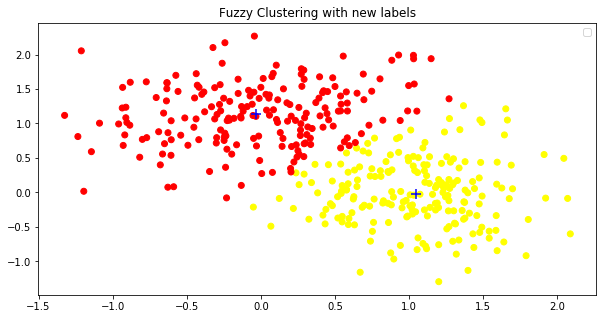

In [16]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y,c=new_labels,cmap='autumn')
ax.set_title('Fuzzy Clustering with new labels')
for i,j in new_centers:
    #plt.scatter()
    ax.scatter(i,j,c='blue',s=100,marker="+")
    plt.gca().legend('Cluster_C1','Cluster_C2')